In [156]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from umap import UMAP
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


In [5]:
data = pd.read_csv("data.csv", index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,label
0,-18.542814,-18.668093,-18.668093,-18.668093,-18.668093,-18.657626,-0.690188,5.438274,1.227493,4.616696,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
1,-17.233382,-17.358661,-17.358661,-17.358661,-17.358661,-16.581489,1.511105,5.112031,1.283484,4.130621,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
2,-18.296087,-18.421367,-18.421367,-18.421367,-18.421367,-18.421367,-16.046306,1.353363,3.334118,2.519160,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
3,-18.343959,-18.469239,-18.469239,-18.469239,-18.469239,-18.469216,-3.172947,2.963999,3.899948,2.573710,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
4,-16.493662,-16.618942,-16.618942,-16.618942,-16.618942,-16.618942,-15.462523,1.110224,2.803240,3.514306,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6747,-15.896701,-16.021980,-16.021980,-16.021980,-16.021980,-16.021980,-4.314925,4.896566,-0.156977,2.280749,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh
6748,-14.477679,-14.602958,-14.602958,-14.602958,-13.442442,2.399502,0.252279,5.188976,4.004814,0.993135,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh
6749,-18.712138,-18.837418,-18.837418,-18.837418,-18.837418,-17.674723,2.650987,2.877205,-0.687073,3.569870,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh
6750,-14.587930,-14.713209,-14.713209,-14.713209,-14.693734,1.604762,2.236519,3.753760,4.607415,0.395305,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh


# Insert title here

# Names
- Alexandra Hernandez
- Colin Kavanagh
- Lily Qiu

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

Unsupervised learning has allowed us to do many things, such as detect anomalies or allow computers to see and analyze images. A typical application of unsupervised learning is when it comes to natural language processing. For example, researchers used unsupervised learning techniques to teach machines to find patterns<a id="noteone"></a>[<sup>[1]</sup>](#onenote). They used an algorithm called Automatic Distillation of Structure, which they used to teach a machine various things, from languages to protein sequencing. However, most of the inputs into the model they used were text data instead of audio data. Another group of researchers explored various unsupervised methods for teaching a machine natural language <a id="notetwo"></a>[<sup>[2]</sup>](#twonote). This research examined and compared how machines learn to how humans learn languages. However, the author states that the unsupervised approach to machines learning language is not well studied, and there is still a lot of research to do about the approach. Finally, another research group attempted to use unsupervised learning to detect variations in English accents <a id="notethree"></a>[<sup>[3]</sup>](#threenote).However, this research only accounted for accents localized to the United Kingdom. It did not account for accented English in other parts of the world. Also, many of the excerpts were, on average, 43 seconds long, and we would like to see if we can detect accents with less data. While these previous research ventures achieved excellent results, many did not consider the breadth of accented speech worldwide and their nuances. We want to explore accented English globally because it is more applicable to general human speech and nuances, which could be applied to speech recognition programs only trained in American English. 

# Problem Statement

Determining where someone is from can be important information in social contexts. Many people’s worldviews and norms are shaped by their origin and other aspects of their identity. While this may be subtle in our everyday lives, these differences are substantial in communication and understanding each other. As we transform our society into a more interconnected one through technologies like the internet, it becomes more and more imperative to understand unfamiliar cultures. <br>

As a human being, it can be easy to determine whether someone’s accent is similar to our own through learned experience. Even if we can’t pinpoint exactly where someone is from, we can notice and understand that someone’s worldview and experiences may differ. Humans can account for these differences through changes in behavior to account for another person’s experiences. <br>

However, as we rely on artificial intelligence to take over more and more occupations, there is a concern regarding professions that depend on a “human touch” to succeed. An example of this is replacing customer service jobs with robots, which has resulted in mass dissatisfaction among those who use the service. This is compared to humans who understand emotions, the scope of a problem, and “people first service.” Currently, we are not focusing on this “human-computer interaction”. <br>
Our project proposes to solve a vital step in human-computer interaction, which involves understanding people as people instead of problems that need to be solved. In this project, we aim to determine where someone is from via samples of their accented English. We propose doing this through various unsupervised machine-learning clustering methods. Our solution can be applied to human-computer interaction problems to help computers better understand the people they are helping in the context of their cultural norms and beliefs. This project can be quantified by properly encoding audio files into vectors. The success of our methods can be quantified through metrics like silhouette score for scoring clustering and the Rand Index for matching predicted clusters with their true label. 

# Data
The dataset that we aimed to use in this project was the **Common Voice** dataset created by [mozilla.org](https://commonvoice.mozilla.org/en/datasets), which contained 10 variables, with a total of 90,474 observations. The dataset contains speech data read by the site's users, and is made up of audio clips from the users. However, because of the data set file size (80GB), we chose to use a different one called AccentDB, a similar–but smaller sized–dataset created by Afroz Ahamad, Ankit Anand, and Dr. Pranesh Bhargava <a id="notefour"></a>[<sup>[4]</sup>](#fournote). </br>

Like the Common Voice dataset, **AccentDB** contains approximately 6,752 observations, with over 500 features for each data point (reduced to 50 using PCA), with 13 coefficients for each feature. These 13 coefficients were from MFCC audio processing, which extracts features from the audio to make it easier for tasks like machine learning. However, to better process the data, we reduced these 13 points to one by taking the mean of all of them. While this could result in some data loss, it was more appropriate for our analysis. Also, many of these points were the same, meaning that averaging them didn’t take away any meaningful data for the most part. </br>

Since this dataset was anonymized prior to obtaining it, the variables concerned were mainly the `accent` of each data point, and its normalized vector. With the set containing normalizations of each point, and only having the label of `accent` to differentiate between points, it allows for less preprocessing to take place, while squashing glaring ethical concerns such as possible personal identification of subjects. 

# Proposed Solution

We will be comparing multiple unsupervised clustering algorithms on their various metrics. The distribution of the different accent audio data will determine which algorithm is best suited for separating the different accents. Separate the data into the training set and the test set. The following are the clustering algorithms we will train. The benchmark in which we will compare our generated clustering is the ground truth clustering of our data as well as metrics like the silhouette score.

#### K-means

K-means clustering is a centroid based clustering. It assumes that data points of the same cluster is close based on euclidean distance. It works by minimizing the distance of each point to the center of its cluster. <br>
Python implementation : <br>
`from sklearn.cluster import KMeans` <br>
`solution = KMeans(n_clusters = number_of_clusters).fit(data_points)`

#### Gaussian Mixture model
Gaussian Mixture models is a distribution based clustering alogorithm. It assumes data points of the same cluster is of the same distribution, with a certain mean and covariance. For each of the k clusters, it computes the optimal coefficient $\pi_k$, mean $\mu_k$, and covariance matrix $\Sigma_k$ that maximizes the probability of X being in that particular cluster.

#### Hierarchical Clustering
Heirarchical clustering is meant for data that has a nested structure for similarity, in that a datapoint can be closer to another datapoint in some respects, but they can both be related to another group of datapoints in another respect. For example, accents from North American countries can be may be the most similar, but they may both be similar to the subset of accents from English speaking nations. This algorithm works by starting with each datapoint in its own cluster and iteratively merging pairs of clusters that have the minimimum distance.

Ward linkage, measurement of cluster distance :
$d(A, B) = \frac{|A||B|}{|A| + |B|} ||\mu_A - \mu_B||^2 = \underset{x \in A \cup B}{\sum} ||x - \mu_{A \cup B}||^2 - \underset{x \in A}{\sum} ||x - \mu_A||^2 - \underset{x \in B}{\sum} ||x - \mu_B||^2$

The caveat for a Hierarchical clustering model, it is not a classification algorithm, and thus we cannot make predictions about accents, given an audio file. It is simply a procedure to cluster a given set of datapoints.

#### Spectral Clustering
Spectral Clustering makes minimal assumptions about the shape of the data, but requires the number of clusters to be provided. It is suitable for this project because we know how many clusters there should be. It consists of representing a datset as a connected graph, with each node as a datapoint and each edge weight representing the similarity between datapoints. Represent the edge weights with matrix $W$, entry $w_{i, j}$ being the weight or similarity between datapoints i and j. The algorithm iteratively makes cuts (removes edges) until there are k connected components left, and the resulting graph represents the datapoints in each of the k clusters.

Laplacian matrix $L_{n \times n} = D - W$

where $D$ is the degree matrix. The degree matrix is a diagonal matrix where each entry $d_{i, i}$ is the weighted degree of vertex $v_i$. In other words, the ith entry of the degree matrix is the sum of the weights of the edges that are adjacent to vertex $v_i$ <br>
$W$ is the weighted adjacency matrix

Like Hierarchical Clustering, Spectral Clustering is merely a procedure to cluster a given set of data, and cannot be used to make classifications.

#### DBSCAN
DBSCAN is a density based clustering that assumes clusters have a high density of data points. It does not require specifying the number of clusters, and can fit clusters of any shape. Before the procedure, define values eps, or the maxmimum distance in which 2 points can be considered neighbors, and minpts, the minimum number of neighbors within radius eps from a point. Core points are data points with more than minpts neighbors. Assign initial core points. 2 points are density connected if there are both within eps distance of a core point, and assign them to the same cluster as the core point. Iterate through every point in the dataset.

# Evaluation Metrics

Since we know the true labels of each datapoint, i.e. since AccentDB is a validated dataset, we know the true accent of each audio file. Thus to obtain the most accurate model, we are able to use external evaluation metrics.

A metric of evaluation of comparing the similarity of the generated clustering to the true clustering is the Rand Index (ARI)

$\text{Rand Index (RI)} = \frac{a + b}{n \choose 2}$

where $a$ is the number of pairs of elements belongs to the same cluster across the generated labels and the true labels <br>
$b$ is the number of pairs of elements that belong to different clusters across the generated labels and the true labels <br>
$n \choose 2$ is the number of possible pairs of elements

However, the regular rand index does not take into account the chance that a datapoint was correctly assigned to a cluster due to random chance instead of good clustering. To adjust for this, we will use the Adjusted Rand Index. The adjusted rand index is as follows: 

$ARI = \frac{\text{Rand Index}-\text{Expected Rand Index}}{\text{Max Rand Index}-\text{Expected Rand Index}}$


`sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)`

#### Silhouette Coefficient

One evaluation metric, which is standard for evaluating clustering algorithms, is the average silhouette coefficient, or silhouette score, which is calculated by the following <br>
For each generated cluster, compute the following : <br>
<br>
$s = \frac{b - a}{max(a, b)}$ <br>
Where a is the average euclidean distance from a datapoint to all other points of the same cluster<br>
And b is the average euclidean distance from a datapoint to all other points in the next nearest cluster <br>
Then take the average across all clusters. The higher the silhouette score, the better the clustering algorithm. <br>

This is different from the rand score in that it does not use ground truth labels to give a score. 
We will generate this metric for all of the clustering algorithms we will use to determine which performs the best with audio data for accent detection.


# Results

## Initial Data Analysis and Dimentionality Reduction

We decided to begin our analysis concerning PCA, t-SNE, and UMAP. We did this because many clustering algorithms, like K-means, suffer from the curse of dimensionality. For this reason, we want to make the workload on the various algorithms we will use easier by doing some initial analysis and dimensionality reduction. However, even if the original purpose of dimensionality reduction was to make it easier for the algorithms to process, we quickly realized that it was the most critical step of the project. This step was the most crucial because we were essentially giving the models a “summary” of the data, and we needed to determine what parts were the most important without leaving out crucial data. We did this initial dimensionality reduction because we wouldn’t be able to get solid results by throwing 500 dimensions at an algorithm like k-means.


To solve this, we needed to reduce the dimensions of the data. The first thing that we did was normalize the data to make it easier to process. 

In [144]:
X = preprocessing.normalize(data.iloc[:, :-1])

After normalizing the data, we threw it into PCA. PCA usually works best for linear data because it performs a linear transformation on the data. We used PCA to reduce each data point from 500 features to 50 features. We did this initial transformation to reduce the number of components for t-SNE since t-SNE doesn’t work great with high dimensional data.

In [145]:
pca = PCA(n_components=50, random_state=1216)
pca_data = pca.fit_transform(X)
#print(pca.explained_variance_ratio_)
#print(np.sum(pca.explained_variance_ratio_))

We also use a label encoder to convert our labels to numbers. 

In [146]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(data["label"])
encoder.classes_

array(['american', 'australian', 'bangla', 'british', 'indian',
       'malayalam', 'odiya', 'telugu', 'welsh'], dtype=object)

Note: Some of the graphs we created are omitted from this notebook because they are not relevant to our overall results. These extra graphs are in the “data-runs.ipynb” file. 

The following is the “best-case” result from our t-SNE analysis.

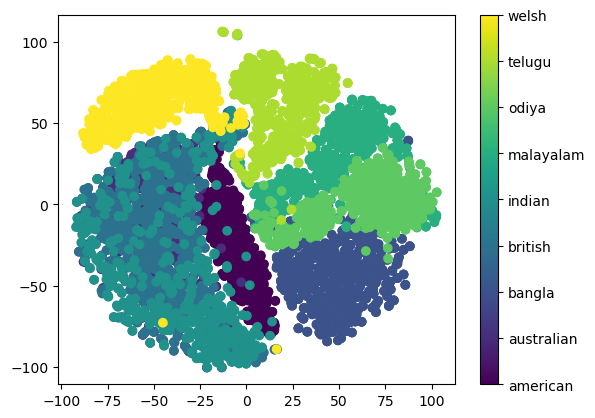

In [168]:
tsne_perp5 = TSNE(n_components=2, perplexity=5, random_state=1216)
tsne_data_perp5 = tsne_perp5.fit_transform(pca_data)
plot = plt.scatter(tsne_data_perp5[:, 0], tsne_data_perp5[:, 1], c=labels_encoded)
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()


We experimented with different hyperparameters for t-SNE, however we found that the data took irregular forms and overlapped with itself, which would only cause more problems for the clustering algorithms when we increased values like the perplexity. (bad t-sne graph)

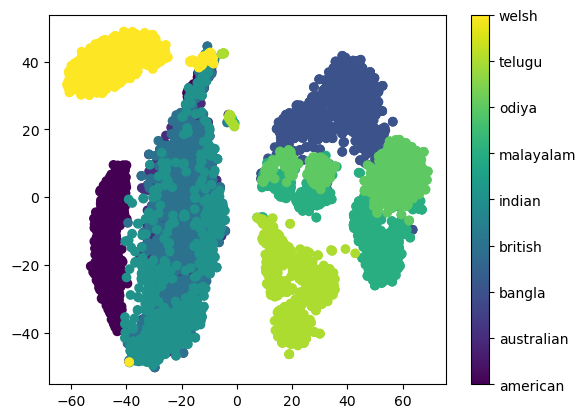

In [169]:
tsne_perp50 = TSNE(n_components=2, perplexity=50, random_state=1216)
tsne_data_perp50 = tsne_perp50.fit_transform(pca_data)
plot = plt.scatter(tsne_data_perp50[:, 0], tsne_data_perp50[:, 1], c=labels_encoded)
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()

We then decided to represent the data using UMAP. We found that the data representation using UMAP was even worse than t-SNE. However, we got a fascinating result from UMAP that was not as well defined in t-SNE. We found that as the number of neighbors increased, the two “main” groupings got further apart. With some exceptions, these two “main” groupings represented “Western” English accents and “Eastern” English accents (we consider the Australian accent to be Western for the sake of analysis). The only exception was that the “Indian” accent was grouped well with the “Western” accents. Overall, this shows some potential for more straightforward classification if we make the goal of classification less specific. 

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


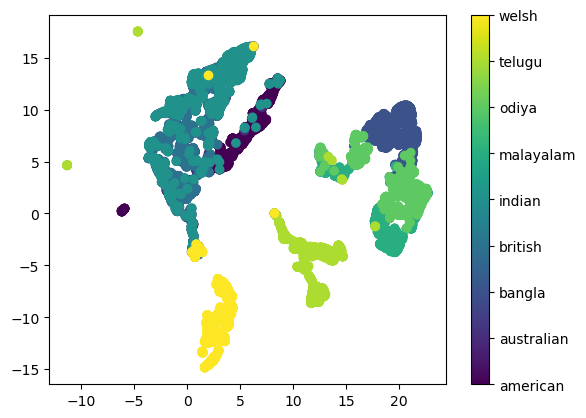

In [170]:
umap20 = UMAP(min_dist=0.1, n_neighbors=20, metric="euclidean", random_state=1216)
umap_data20 = umap20.fit_transform(X)
plot = plt.scatter(umap_data20[:, 0], umap_data20[:, 1], c=labels_encoded)
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()

Concerning PCA, t-SNE, and UMAP, the best data representation is the t-SNE representation, where the perplexity is 5. We found that putting the data into PCA first, then t-SNE gave us an overall better representation compared to throwing all the data into t-SNE directly. 

Our choice of data representation is a crucial conclusion for the rest of the project. Even if it is the best representation, it still has significant problems. For example, about three groupings (Indian, Australian, and British) overlap, making it much more difficult for the clustering algorithms to divide the data into nine clusters. 

From now on, whenever we use the variable "X," we refer to the representation given by this t-SNE representation.

In [150]:
X = tsne_data_perp5

## K-means

The first unsupervised algorithm that we opted to use is k-means clustering. This algorithm attempts to cluster data into spherical clusters. We used “k-means++” for the initialization of the centroids. K-means++ is an excellent alternative to random initialization because it uses a “smart” initialization of the centroids compared to the “dumb” initialization of centroids through random selection. 

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.36669227
0.3993384396805825


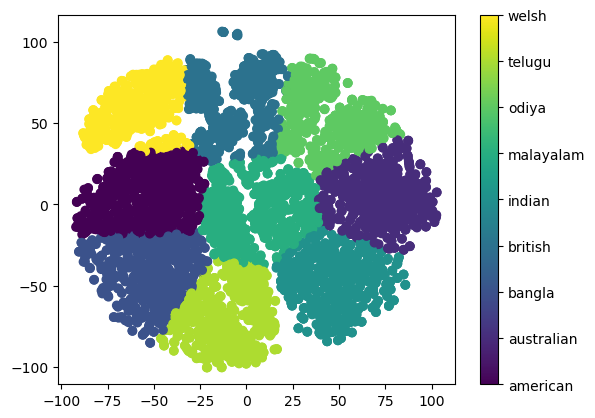

In [171]:
kmeans = KMeans(init="k-means++", n_clusters=9)
kmeans.fit(X)
print(silhouette_score(X, kmeans.labels_))
print(adjusted_rand_score(labels_encoded, kmeans.labels_))
plot = plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()

As we can see, these initial results could be better. These results are because k-means is a spherical clustering algorithm, and we can see that the actual clusters in this representation are not spherical. 

## Gaussian Mixture Models (GMM):
The next algorithm we used was a Gaussian Mixture Model (GMM). To use a GMM, you need to specify which type of covariance matrix you want the model to use. In the following cells, we experiment with the ‘full,’ ‘tied,’ ‘diag,’ and ‘spherical’ covariance types. 

### Full Covariance

0.3601676
0.45922322900123613


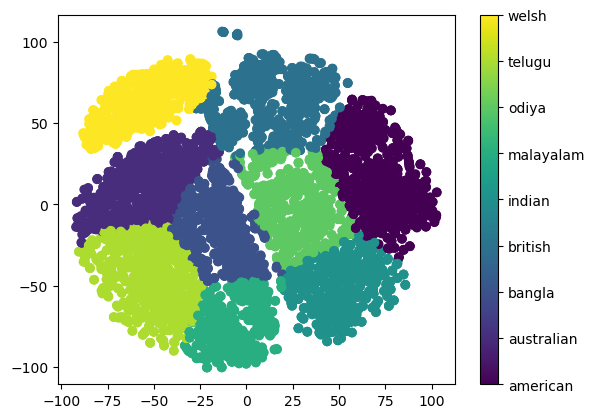

(6752, 2)

In [172]:
gmmFull = GaussianMixture(covariance_type="full", n_components=9)
gmmFull.fit(X)
print(silhouette_score(X, gmmFull.predict(X)))
print(adjusted_rand_score(labels_encoded, gmmFull.predict(X)))
plot = plt.scatter(X[:, 0], X[:, 1], c=gmmFull.predict(X))
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()
X.shape

### Tied Covariance

0.34798634
0.37873885404175284


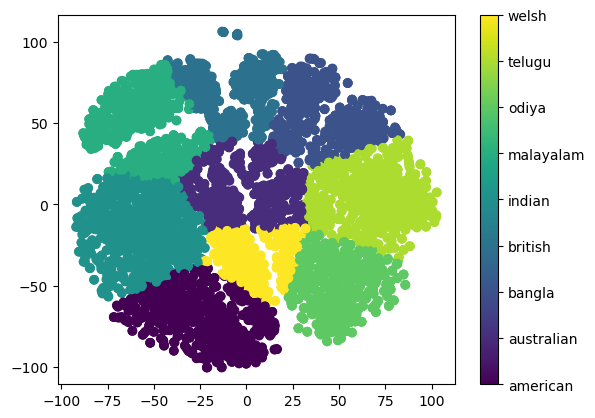

In [173]:
gmmTied = GaussianMixture(covariance_type="tied", n_components=9)
gmmTied.fit(X)
print(silhouette_score(X, gmmTied.predict(X)))
print(adjusted_rand_score(labels_encoded, gmmTied.predict(X)))
plot = plt.scatter(X[:, 0], X[:, 1], c=gmmTied.predict(X))
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()

### Diag Covariance

0.35755992
0.4181345749034699


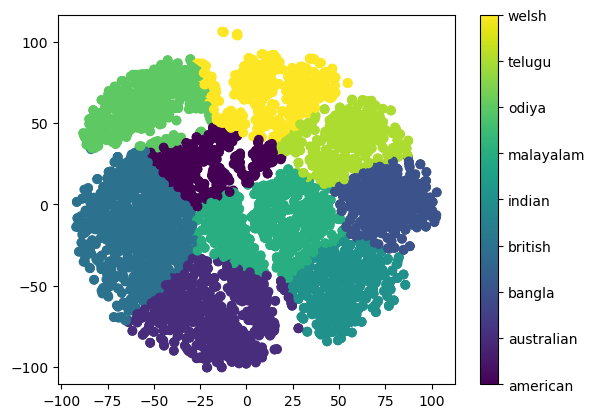

In [174]:
gmmDiag = GaussianMixture(covariance_type="diag", n_components=9)
gmmDiag.fit(X)
print(silhouette_score(X, gmmDiag.predict(X)))
print(adjusted_rand_score(labels_encoded, gmmDiag.predict(X)))
plot = plt.scatter(X[:, 0], X[:, 1], c=gmmDiag.predict(X))
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()

### Spherical Covariance

0.3619717
0.3779915547387747


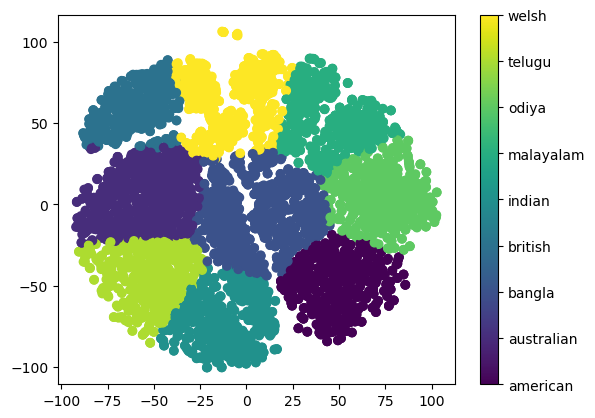

In [175]:
gmmSpherical = GaussianMixture(covariance_type="spherical", n_components=9)
gmmSpherical.fit(X)
print(silhouette_score(X, gmmSpherical.predict(X)))
print(adjusted_rand_score(labels_encoded, gmmSpherical.predict(X)))
plot = plt.scatter(X[:, 0], X[:, 1], c=gmmSpherical.predict(X))
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()

Experimenting with all four of the covariance types, we did not see any significant differences between the four.


While we ran the data through agglomerative clustering, DBSCAN, and spectral clustering, the results were similar, to the results that we got with K-means and GMM. Therefore, we have decided to omit the respective results from this report because they are irrelevant. Our tests can be found in the [data-runs.ipynb]("data-runs.csv") file.

# Discussion

### Interpreting the result

From our process and results, we found that in clustering and classification, t-SNE optimized distinctions between the data points the best, using a `perplexity` hyperparameter of 5. However, even with t-SNE showing some separate and distinct clusters, there continues to be overlap. This is due t-SNE–under our `perplexity` parameter–classifying Indian, Australian, and British accents as the same cluster (despite different labeling), suggesting that the t-SNE model prioritized the vectorized accents over the actual labeling. </br>

Investigating other clustering methods besides t-SNE, we also looked at the data using K-Means and Gaussian Mixture Model (GMM) to either verify–or counter–our assumption of t-SNE being the optimal clustering algorithm for the **AccentDB** data. The clusters for accents were further conglomerated together (rather than separate), despite the labeling of the data points being distinct, whereas the t-SNE clusters were more distinct *and* separated (even with the overlapping points). As a result, this verified that t-SNE was optimized for our dataset, despite its flaws. </br>

In examining the clustering results and similarities between data points, the silhouette score gets a maximum value of 0.37, and a maximum adjusted rand score of 0.48 for our agglomerative clustering. With such values, it’s apparent that t-SNE’s inability to differentiate between Indian, Australian, and British accents affects the clustering accuracy, as well as the commonality scores between different (and somewhat similar) accents. </br>

Providing further understanding to this overlap beyond clustering, there are–vocally–similarities between the three accents, such as Indian accents and speech having similar timing (based on word emphasis) and pitch to that in Australian English (especially Aboriginal), as well as British accents (primarily in Cardiff and Wales), rounding certain parts of words (e.g. the “a” in Cardiff), which has some similarities to word pronunciation in Australian accents<a id="notefive"></a>[<sup>[5]</sup>](#fivenote). By understanding the context behind the overlap from a linguistic perspective, it suggests that even in the normalization of vocal data points, the vocal aspects were characterized similar enough to overlap, even with differing labels. 

### Limitations

As mentioned in the **Data** section above, we aimed to use a different dataset containing several more variables (including subject identifiers like `age`, `gender`), however due to data sizeability concerns, could not load or preprocess it sufficiently, both locally and on the cloud. As a result, our “real” data set doesn’t include as many observations as the expected one, despite having a smaller storage capacity. If given more data (and possibly a platform/machine that could sufficiently preprocess larger datasets), our clustering and classification techniques would show more separated clusters and higher specificity on labeling, as we would be working with more variables in the project. </br>

Furthermore, with the `accent` labeling in the **AccentDB** dataset being limited to 9 different types (American, Australian, Bangla, British, Indian, Malayalam, Odiya, Telugu, Welsh), there isn’t a lot of room for differentiating/identifying accents outside of the main 9; more so, with `locality` omitted from the dataset, it lead to overlapping of accents on each other, causing the clusters for some accents to fail. From this, omission of `locality` is considered a confound in our clustering and classification models.    

### Ethics & Privacy

Since this dataset is open-source, and–therefore–permitted for public use, it's certain that the voices in the AccentDB dataset consented to be included; as a result, subjects included in the observations have informed consent. Furthermore, since the data set was normalized into vector format (excluding the labeling of accents), possible subject identifiers (e.g. `locality`, `gender`, `age`) were excluded, therefore any threat to revealing participant identity was mitigated. </br>

Though subject identifiers aren’t present in the project, their exclusion from the dataset can create biases issues, as we can’t be sure on the demographic of each participant; as a result, completing our clustering and classifications may be skewed towards an unknown account (e.g. male and female accents of the same `accent` label may be placed in different clusters). This would affect how the clustering and classification models work on the data set. To counter this issue, we will account for this confound when examining our results from the evaluations. </br>

Lastly, to ensure data security and fair usage/viewing, the data base used and how we processed it throughout in models and classifications will be easily accessible on the repository, ensuring that our methods are transparent with the public. 

### Conclusion

Through our comparison of several classification and clustering methods on the **AccentDB** dataset, we found that while some accents cluster separately–and clearly–from one another, there is a significant amount of cluster overlap, suggesting that some accents are less differentiable than others. However, in determining the best clustering model to identify the differing accents, the t-SNE model (under the `perplexity` hyperparameter with value 5) suggests the most distribution and difference in clustering the different accents. Fitting into the bigger context, this outcome (in terms of the data) is reasonable, as some key factors that could affect how the accents clustered weren’t present in the dataset; more so, the lack of factors is the main confounding factor in our project. If continued on in the future, we would most likely continue using t-SNE but more exploration amongst other hyperparameters like `learning_rate` or `metric`.

# Footnotes
<a id="onenote"><a href="#noteone">1. </a></a> Solan, Z., Horn, D., Ruppin, E., & Edelman, S. (2005). Unsupervised learning of natural languages. Proceedings of the National Academy of Sciences, 102(33), 11629-11634. https://doi.org/10.1073/pnas.0409746102<br>
<a id="twonote"><a href="#notetwo">2. </a></a> Klein, Dan. The unsupervised learning of natural language structure. Stanford:: Stanford University, 2005.<br>
<a id="threenote"><a href="#notethree">3. </a></a> Najafian, Maryam, et al. "Unsupervised model selection for recognition of regional accented speech." Fifteenth annual conference of the international speech communication association. 2014.<br>
<a id="fournote"><a href="#notefour">4. </a></a> Ahamad, Afroz, et al. "AccentDB: A Database of Non-Native English Accents to Assist Neural Speech Recognition." Proceedings of The 12th Language Resources and Evaluation Conference. 2020. https://www.aclweb.org/anthology/2020.lrec-1.659<br>
<a id="fivenote"><a href="#notefive">5. </a></a> Regional accents of English. (2024, March 3). *Wikipedia*. https://en.wikipedia.org/wiki/Regional_accents_of_English<br>